## Uploading Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving stop_dataset.zip to stop_dataset.zip


## Extracting the Dataset

In [3]:
import zipfile

with zipfile.ZipFile("stop_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

## Checking the folder structure

In [4]:
import os
print(os.listdir("stop_dataset"))

['not_stop', 'stop']


## Counting Images

In [5]:
import os
notstop_count = len(os.listdir("stop_dataset/not_stop"))
stop_count = len(os.listdir("stop_dataset/stop"))

print("Not Stop images:", notstop_count)
print("Stop images:", stop_count)
print("Total images:", notstop_count + stop_count)

Not Stop images: 100
Stop images: 97
Total images: 197


## Sample Images

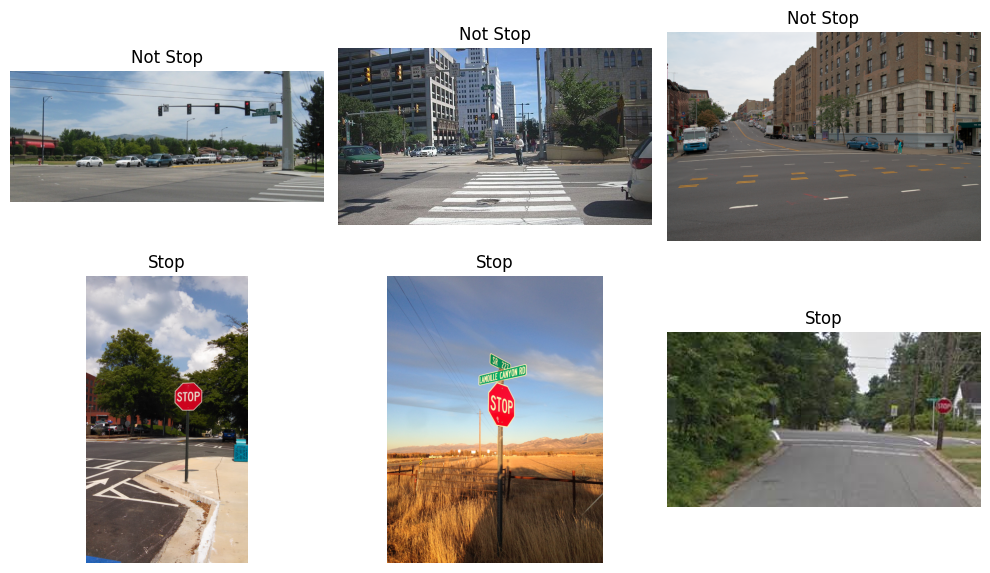

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

notstop_samples = random.sample(os.listdir("stop_dataset/not_stop"), 3)
stop_samples = random.sample(os.listdir("stop_dataset/stop"), 3)

plt.figure(figsize=(10,6))

for i, fname in enumerate(notstop_samples):
    img = mpimg.imread(f"stop_dataset/not_stop/{fname}")
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title("Not Stop")
    plt.axis("off")

for i, fname in enumerate(stop_samples):
    img = mpimg.imread(f"stop_dataset/stop/{fname}")
    plt.subplot(2,3,i+4)
    plt.imshow(img)
    plt.title("Stop")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Preprocessing

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    "stop_dataset",
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    "stop_dataset",
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 158 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [31]:
print(train_gen.class_indices)

{'not_stop': 0, 'stop': 1}


## Building a CNN model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## Training the CNN model

In [33]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5470 - loss: 0.7821 - val_accuracy: 0.5128 - val_loss: 0.6780
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4639 - loss: 0.7157 - val_accuracy: 0.6667 - val_loss: 0.6523
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 923ms/step - accuracy: 0.6035 - loss: 0.6390 - val_accuracy: 0.6410 - val_loss: 0.5890
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7199 - loss: 0.5693 - val_accuracy: 0.7436 - val_loss: 0.4924
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 974ms/step - accuracy: 0.8053 - loss: 0.4691 - val_accuracy: 0.8462 - val_loss: 0.3983
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8267 - loss: 0.3999 - val_accuracy: 0.8718 - val_loss: 0.3584
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8390 - loss: 0.3535 - val_accuracy: 0.8974 - val_loss: 0.3054
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8793 - loss: 0.2833 - val_accuracy: 0.8974 - val_loss: 0.2860
Epoch 9/3

## Summary of the model

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,875,845 (18.60 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,250,564 (12.40 MB)

## Visualizing training results

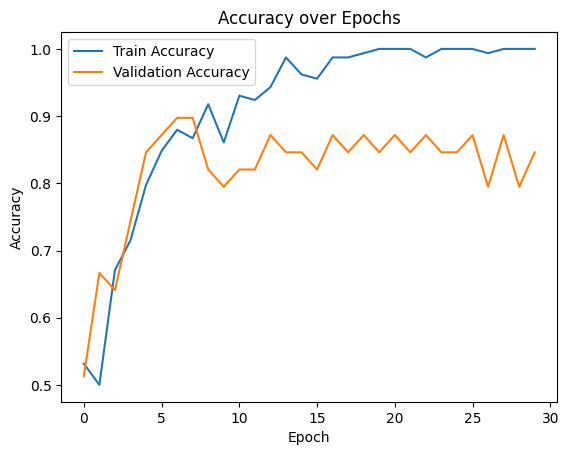

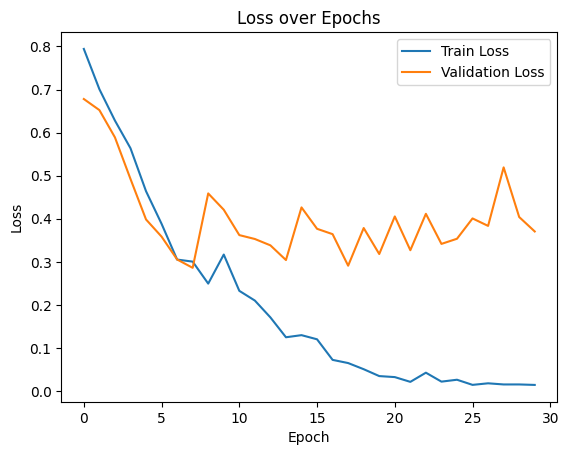

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Tested on validation images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


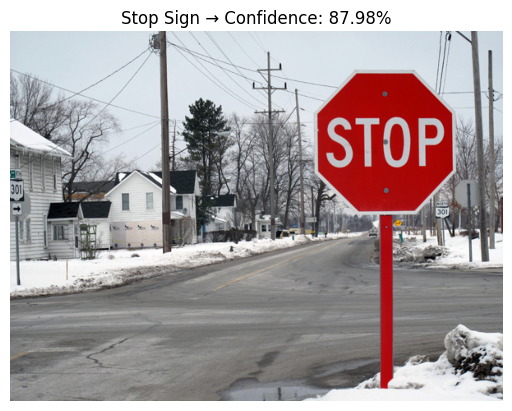

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


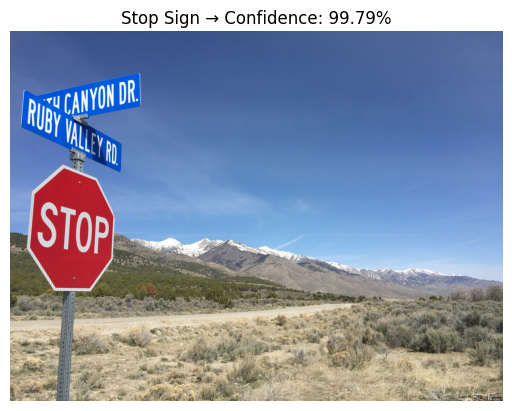

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


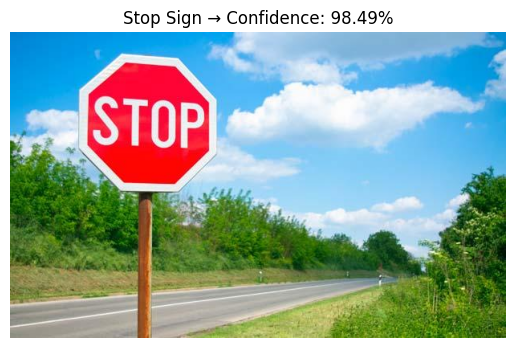

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


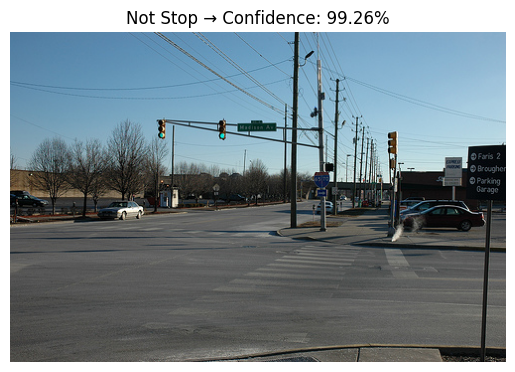

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


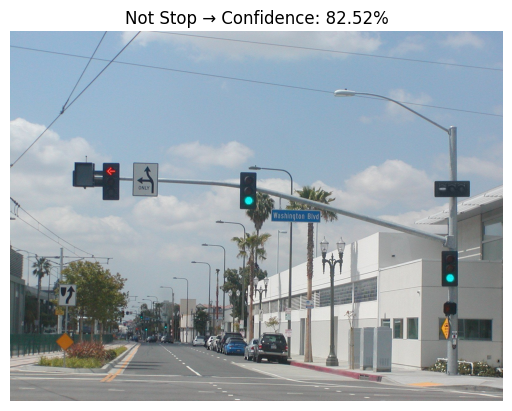

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


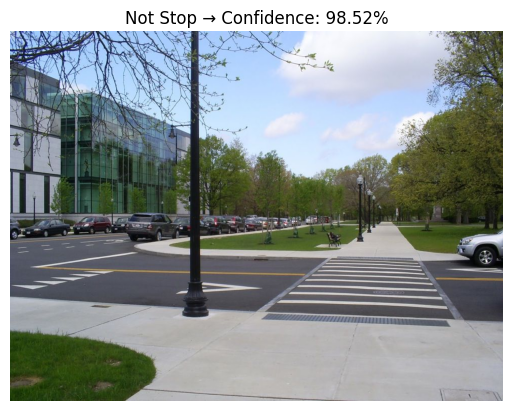

In [37]:
import cv2
import numpy as np

stop_folder = "stop_dataset/stop"
not_stop_folder = "stop_dataset/not_stop"
st   img = cv2.imread(file_path)
    if img is None:
        print(f"Cannot read file: {file_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (64,64))
    img_array = np.expand_dims(img_resized/255.0, axis=0)
    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        label = "Stop Sign"
        confidence = prediction * 100
    else:
        label = "Not Stop"
        confidence = (1 - prediction) * 100

    plt.imshow(img_rgb)
    plt.title(f"{label} → Confidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()op_samples = random.sample(os.listdir(stop_folder), 3)
not_stop_samples = random.sample(os.listdir(not_stop_folder), 3)
all_samples = [(stop_folder, f) for f in stop_samples] + [(not_stop_folder, f) for f in not_stop_samples]

for folder, fname in all_samples:
    file_path = os.path.join(folder, fname)


## Testing on new Images

In [46]:
from google.colab import files
uploaded = files.upload()

Saving car1.jpg to car1 (3).jpg
Saving testing.jpeg to testing (1).jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


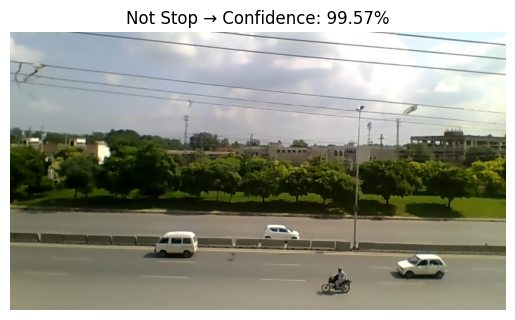

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


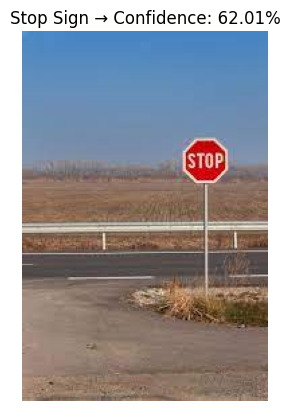

In [52]:
new_images = ["car1.jpg", "testing.jpeg"]
for file_path in new_images:
    img = cv2.imread(file_path)
    if img is None:
        print(f"Cannot read file: {file_path}")
        continue
    h, w = img.shape[:2]
    scale = 64 / min(h, w)
    new_h, new_w = int(h*scale), int(w*scale)
    img_resized = cv2.resize(img, (new_w, new_h))

    start_h = (new_h - 64) // 2
    start_w = (new_w - 64) // 2
    img_cropped = img_resized[start_h:start_h+64, start_w:start_w+64]

    img_array = np.expand_dims(img_cropped / 255.0, axis=0)

    prediction = model.predict(img_array)[0][0]
    pred_class = int(round(prediction))

    label = "Stop Sign" if pred_class == 1 else "Not Stop"
    confidence = prediction*100 if pred_class==1 else (1-prediction)*100

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"{label} → Confidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()